In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r"C:\Users\KISHORE\Desktop\FAANG\FAANG.csv")
df.head()

,Company,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,...,Price to Book Ratio,Enterprise Value,Total Debt,Total Assets,Total Equity,Beta (5Y),Annual Dividend Rate,Trailing Twelve Months (TTM) Revenue,Trailing Twelve Months (TTM) EBITDA,Trailing Twelve Months (TTM) Earnings
0,Apple,AAPL,1/3/2005,1.156786,1.162679,1.117857,1.130179,0.954409,691992000,3.580000e+12,...,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
1,Apple,AAPL,1/4/2005,1.139107,1.169107,1.124464,1.141786,0.964210,1096810400,3.580000e+12,...,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
2,Apple,AAPL,1/5/2005,1.151071,1.165179,1.143750,1.151786,0.972655,680433600,3.580000e+12,...,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
3,Apple,AAPL,1/6/2005,1.154821,1.159107,1.130893,1.152679,0.973409,705555200,3.580000e+12,...,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
4,Apple,AAPL,1/7/2005,1.160714,1.243393,1.156250,1.236607,1.044284,2227450400,3.580000e+12,...,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN


In [7]:
df.columns

Index(['Company', 'Ticker', 'Date', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'Market Cap', 'PE Ratio', 'Beta', 'EPS',
       'Forward PE', 'Revenue', 'Gross Profit', 'Operating Income',
       'Net Income', 'Debt to Equity', 'Return on Equity (ROE)',
       'Current Ratio', 'Dividends Paid', 'Dividend Yield',
       'Quarterly Revenue Growth', 'Analyst Recommendation', 'Target Price',
       'Free Cash Flow', 'Operating Margin', 'Profit Margin', 'Cash Ratio',
       'Quick Ratio', 'Price to Book Ratio', 'Enterprise Value', 'Total Debt',
       'Total Assets', 'Total Equity', 'Beta (5Y)', 'Annual Dividend Rate',
       'Trailing Twelve Months (TTM) Revenue',
       'Trailing Twelve Months (TTM) EBITDA',
       'Trailing Twelve Months (TTM) Earnings'],
      dtype='object')

In [9]:
df.shape

(23055, 41)

In [10]:
df.isnull().sum()

Company                                      0
Ticker                                       0
Date                                         0
Open                                         0
High                                         0
Low                                          0
Close                                        0
Adj Close                                    0
Volume                                       0
Market Cap                                   0
PE Ratio                                     0
Beta                                      4982
EPS                                          0
Forward PE                                   0
Revenue                                  23055
Gross Profit                             23055
Operating Income                         23055
Net Income                                   0
Debt to Equity                               0
Return on Equity (ROE)                       0
Current Ratio                                0
Dividends Pai

In [11]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
#dropping all column that are having extwnive missing vals
df=df.drop(['Total Assets', 'Total Equity', 'Beta (5Y)', 'Annual Dividend Rate','Trailing Twelve Months (TTM) Revenue','Trailing Twelve Months (TTM) EBITDA','Trailing Twelve Months (TTM) Earnings','Dividends Paid',
'Dividend Yield','Revenue', 'Gross Profit', 'Operating Income','Cash Ratio','Beta'],axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23055 entries, 0 to 23054
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Company                   23055 non-null  object        
 1   Ticker                    23055 non-null  object        
 2   Date                      23055 non-null  datetime64[ns]
 3   Open                      23055 non-null  float64       
 4   High                      23055 non-null  float64       
 5   Low                       23055 non-null  float64       
 6   Close                     23055 non-null  float64       
 7   Adj Close                 23055 non-null  float64       
 8   Volume                    23055 non-null  int64         
 9   Market Cap                23055 non-null  float64       
 10  PE Ratio                  23055 non-null  float64       
 11  EPS                       23055 non-null  float64       
 12  Forward PE        

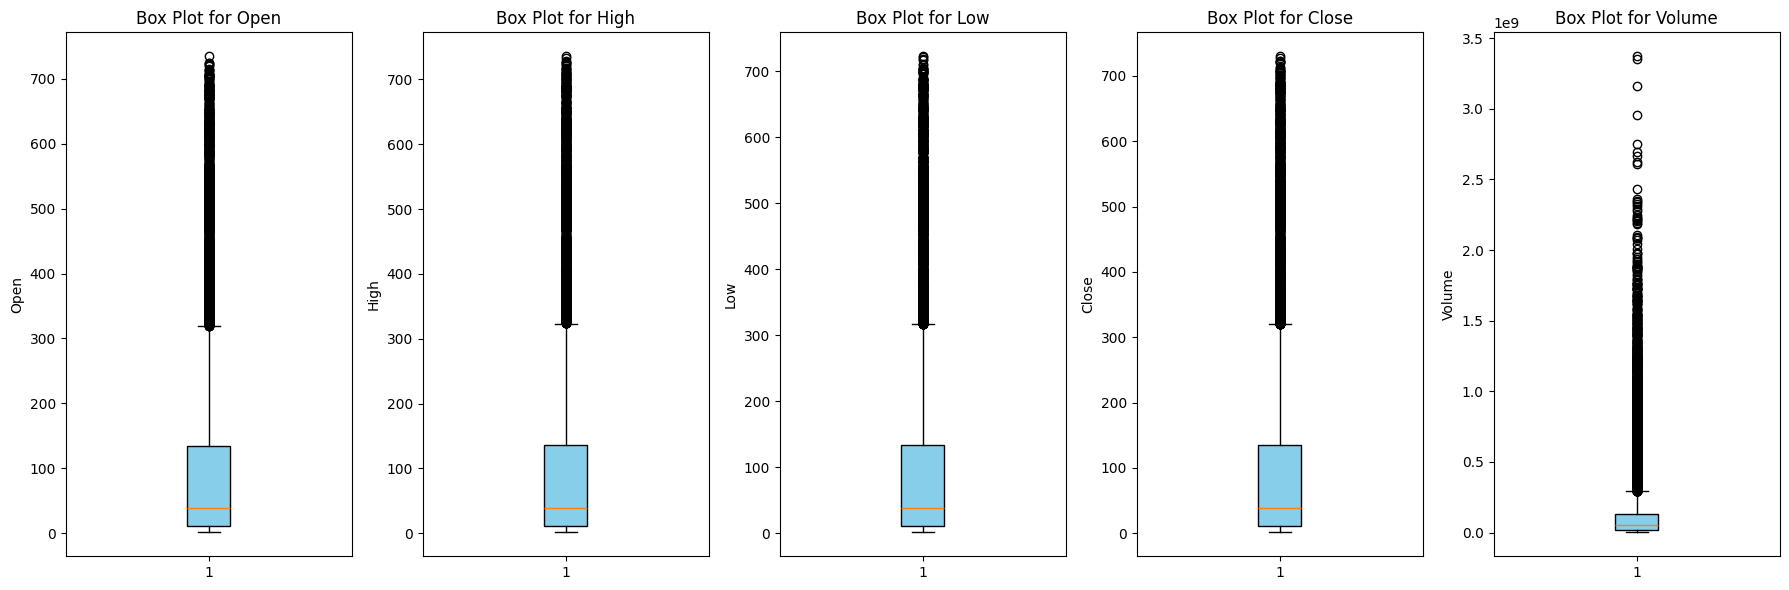

In [14]:
import matplotlib.pyplot as plt

columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Volume']
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(18, 6))
for i, column in enumerate(columns_to_plot):
    axes[i].boxplot(df[column], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    axes[i].set_title(f'Box Plot for {column}', fontsize=12)
    axes[i].set_ylabel(column, fontsize=10)

plt.tight_layout()
plt.show()

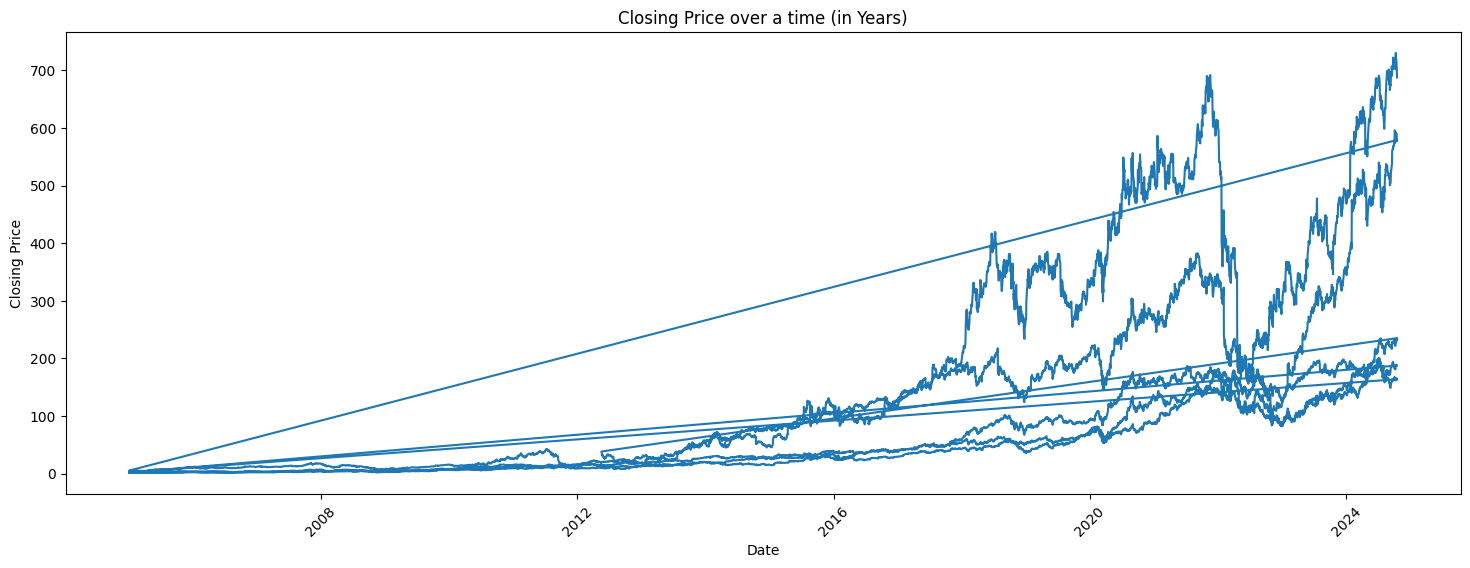

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
plt.plot(df['Date'], df['Close'])
plt.title('Closing Price over a time (in Years)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.show()

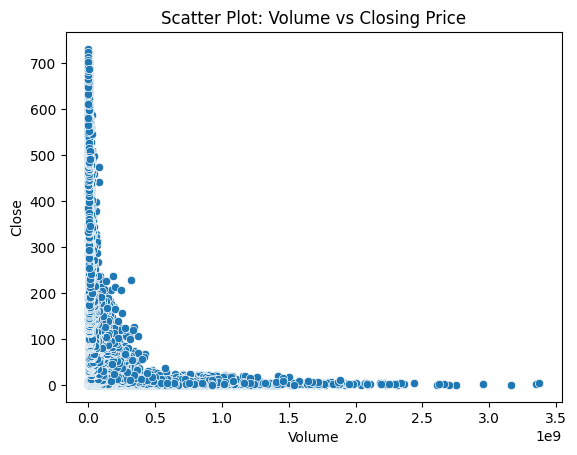

In [17]:
import seaborn as sns
sns.scatterplot(x=df['Volume'], y=df['Close'])
plt.title('Scatter Plot: Volume vs Closing Price')
plt.show()

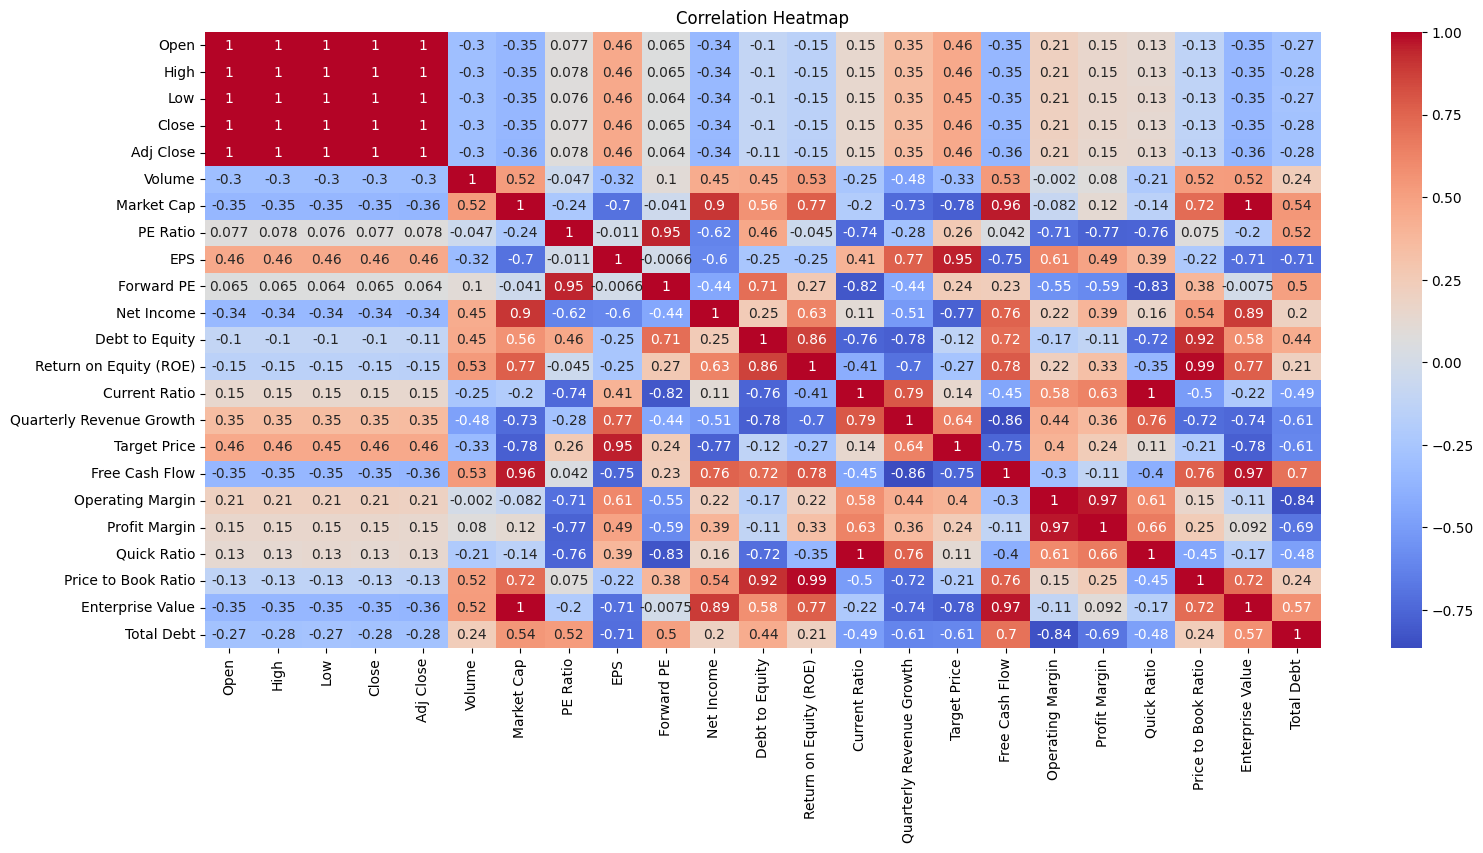

In [19]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
correlation = df_numeric.corr()

plt.figure(figsize=(18,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [23]:
apple_df = df[df['Company'] == 'Apple']
facebook_df = df[df['Company'] == 'Facebook']
amazon_df = df[df['Company'] == 'Amazon']
google_df = df[df['Company'] == 'Google']
netflix_df = df[df['Company'] == 'Netflix']

In [24]:
facebook_df.head()

,Company,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,...,Quarterly Revenue Growth,Analyst Recommendation,Target Price,Free Cash Flow,Operating Margin,Profit Margin,Quick Ratio,Price to Book Ratio,Enterprise Value,Total Debt
4983,Facebook,META,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.115242,573576400,1.470000e+12,...,0.221,buy,601.58,32011874304,0.38105,0.34339,2.688,9.359326,1.440000e+12,3.799100e+10
4984,Facebook,META,2012-05-21,36.529999,36.660000,33.000000,34.029999,33.927845,168192700,1.470000e+12,...,0.221,buy,601.58,32011874304,0.38105,0.34339,2.688,9.359326,1.440000e+12,3.799100e+10
4985,Facebook,META,2012-05-22,32.610001,33.590000,30.940001,31.000000,30.906942,101786600,1.470000e+12,...,0.221,buy,601.58,32011874304,0.38105,0.34339,2.688,9.359326,1.440000e+12,3.799100e+10
4986,Facebook,META,2012-05-23,31.370001,32.500000,31.360001,32.000000,31.903942,73600000,1.470000e+12,...,0.221,buy,601.58,32011874304,0.38105,0.34339,2.688,9.359326,1.440000e+12,3.799100e+10
4987,Facebook,META,2012-05-24,32.950001,33.209999,31.770000,33.029999,32.930851,50237200,1.470000e+12,...,0.221,buy,601.58,32011874304,0.38105,0.34339,2.688,9.359326,1.440000e+12,3.799100e+10


In [25]:
apple_df.to_csv(r'C:\Users\KISHORE\Desktop\FAANG\apple.csv', index=False)
facebook_df.to_csv(r'C:\Users\KISHORE\Desktop\FAANG\facebook.csv', index=False)
amazon_df.to_csv(r'C:\Users\KISHORE\Desktop\FAANG\amazon.csv', index=False)
google_df.to_csv(r'C:\Users\KISHORE\Desktop\FAANG\google.csv', index=False)
netflix_df.to_csv(r'C:\Users\KISHORE\Desktop\FAANG\netflix.csv', index=False)